In [2]:
# loading libraries
import cv2
import zipfile
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# mount the drive
# this code was executed on GoogleColab and was loading files from a Kaggle archive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# disctionary of faces (face image + name)
faces = {}
# looping though zip file
with zipfile.ZipFile("drive/MyDrive/archive/archive.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".jpg"):
            continue
        with facezip.open(filename) as image:
            faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)

In [4]:
from pyparsing.helpers import printables
# create a facematrix
facematrix_mild = []
facematrix_verymild = []
facematrix_non = []
facematrix_moderate = []
for key,val in faces.items():
    # each row is a flattened face image
    if key.split("/")[2] == 'MildDemented':
      facematrix_mild.append(val.flatten()/255)
    if key.split("/")[2] == 'VeryMildDemented':
      facematrix_verymild.append(val.flatten()/255)
    if key.split("/")[2] == 'NonDemented':
      facematrix_non.append(val.flatten()/255)
    if key.split("/")[2] == 'ModerateDemented':
      facematrix_moderate.append(val.flatten()/255)
# cast list of lists to np.array
facematrix_mild = np.array(facematrix_mild)
facematrix_verymild = np.array(facematrix_verymild)
facematrix_non = np.array(facematrix_non)
facematrix_moderate = np.array(facematrix_moderate)

In [5]:
variances_mild = np.zeros(facematrix_mild.shape[1])
# calculate variance
for i in range(facematrix_mild.shape[1]):
  variances_mild[i] = facematrix_mild[:,i].std()

variances_verymild = np.zeros(facematrix_verymild.shape[1])
for i in range(facematrix_verymild.shape[1]):
  variances_verymild[i] = facematrix_verymild[:,i].std()

variances_non = np.zeros(facematrix_non.shape[1])
for i in range(facematrix_non.shape[1]):
  variances_non[i] = facematrix_non[:,i].std()


variances_moderate = np.zeros(facematrix_moderate.shape[1])
for i in range(facematrix_moderate.shape[1]):
  variances_moderate[i] = facematrix_moderate[:,i].std()

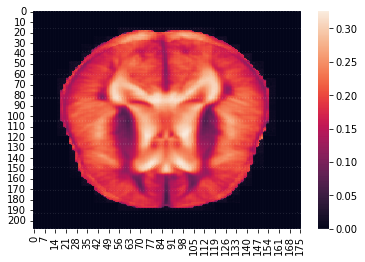

In [6]:
heatmap_mild = sns.heatmap(variances_mild.reshape((208,176)),alpha = 0.9)
plt.show()

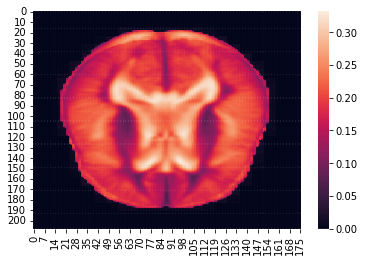

In [7]:
heatmap_verymild = sns.heatmap(variances_verymild.reshape((208,176)),alpha = 0.9)
plt.show()

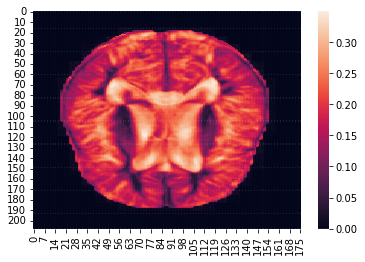

In [8]:
heatmap_moderate = sns.heatmap(variances_moderate.reshape((208,176)),alpha = 0.9)
plt.show()